# Earth System Data Lab Exercise - EO Summer School 2018

# Exercise 1: Introduction to Earth System Data Lab and its API to access the cube data

## The Data Analytics Toolkit for Python

This notebook is describes how to use access the Eart System Data Cube (ESDC) using the Python Data Analytics Toolkit (DAT). It is meant as a starting point for the exploaration and analysis of the ESDC. The Python DAT draws heavily on [xarray](http://xarray.pydata.org/en/stable/), a "pandas-like and pandas-compatible toolkit for analytics on multi-dimensional arrays". Xarray implements the common data model of Netcdf in memory and nicely conserves the strucutre and all metainformation of the data in the ESDC. Thus, the full power of xarray and dask (for out-of-core computation) is immediatley available ot work with ESDC. 

In the following, typical steps a first-time user may take to explore the ESDC and common analytical procedures and visualisations are introduced. Note, however, that this example is b yno means exhaustive - the DAT is full ycompatible with the entire Python ecosystem and therefore offers almost unlimited approahces to specific analyitical needs. 

In [1]:
import xarray as xr

### Open the low-resolution data cube

There are two ways to achieve this. Either use native ESDL Data Access API:

In [2]:
#from esdl import Cube

#cube = Cube.open("/home/jovyan/work/datacube/esdc-8d-0.25deg-1x720x1440-1.0.1_1")
#ESDC = cube.data.dataset()    # this converts the cube object to xarray Dataset. It may take a while...

... or open the zarr version of the cube using xarray open_zarr function (this is only applicable to zarr cube (i.e. one with "zarr" suffix at the cube name)):

In [3]:
ESDC = xr.open_zarr("/home/jovyan/work/datacube/esdc-8d-0.25deg-1x720x1440-1.0.1_1_zarr")

**NOTE:** Zarr cube is still at experimental phase. It is usable but not all cubes have their equivalent zarr cubes

References:<br>
zarr: https://zarr.readthedocs.io/en/stable/<br>
xarray open dataset API: http://xarray.pydata.org/en/stable/api.html#dataset-methods

In [4]:
ESDC.precipitation

<xarray.DataArray 'precipitation' (time: 506, lat: 720, lon: 1440)>
dask.array<shape=(506, 720, 1440), dtype=float32, chunksize=(1, 720, 1440)>
Coordinates:
  * lat      (lat) float32 89.875 89.625 89.375 89.125 88.875 88.625 88.375 ...
  * lon      (lon) float32 -179.875 -179.625 -179.375 -179.125 -178.875 ...
  * time     (time) datetime64[ns] 2001-01-05 2001-01-13 2001-01-21 ...
Attributes:
    comment:        Precipitation based on the GPCP dataset.
    project_name:   GPCP
    references:     Adler, Robert F., et al. "The version-2 global precipitat...
    source_name:    Precip
    standard_name:  precipitation_flux
    units:          mm/day
    url:            http://precip.gsfc.nasa.gov/

### The array of values can be also accessed directly

In [5]:
ESDC['lon'].values

array([-179.875, -179.625, -179.375, ...,  179.375,  179.625,  179.875], dtype=float32)

###  xarray offers rich set of built-in convenience functions
see the [API reference](http://xarray.pydata.org/en/stable/api.html) for full reference!
### Mean over all dimensions

In [6]:
all_mean = ESDC.mean(skipna=True).compute()
all_mean

<xarray.Dataset>
Dimensions:                            ()
Data variables:
    aerosol_optical_thickness_1610     float32 0.106666
    aerosol_optical_thickness_550      float32 0.173698
    aerosol_optical_thickness_555      float32 0.172338
    aerosol_optical_thickness_659      float32 0.148715
    aerosol_optical_thickness_865      float32 0.124077
    air_temperature_2m                 float32 278.716
    bare_soil_evaporation              float32 0.0536708
    black_sky_albedo                   float32 0.421412
    burnt_area                         float32 28.3154
    c_emissions                        float32 0.24708
    country_mask                       float64 297.4
    evaporation                        float32 0.819095
    evaporative_stress                 float32 0.806238
    fractional_snow_cover              float32 25.7361
    gross_primary_productivity         float32 2.27052
    interception_loss                  float32 0.0793832
    land_surface_temperature       

### Mean over time and latitude, result is a dataset again

In [7]:
precip_avg = ESDC['precipitation'].mean(dim = ["time","lat"], skipna=True).compute()
precip_avg    

<xarray.DataArray 'precipitation' (lon: 1440)>
array([ 1.07089 ,  1.07089 ,  0.952765, ...,  1.645363,  1.262889,  1.262889], dtype=float32)
Coordinates:
  * lon      (lon) float32 -179.875 -179.625 -179.375 -179.125 -178.875 ...

###  Simple plotting with xarrays implementation of matplotlib
#### import additional libraries

In [8]:
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sn
%matplotlib inline

### Select 2d image (lat/lon) given a time as integer index

In [9]:
precip2d = ESDC.precipitation.isel(time=123)
precip2d

<xarray.DataArray 'precipitation' (lat: 720, lon: 1440)>
dask.array<shape=(720, 1440), dtype=float32, chunksize=(720, 1440)>
Coordinates:
  * lat      (lat) float32 89.875 89.625 89.375 89.125 88.875 88.625 88.375 ...
  * lon      (lon) float32 -179.875 -179.625 -179.375 -179.125 -178.875 ...
    time     datetime64[ns] 2003-09-10
Attributes:
    comment:        Precipitation based on the GPCP dataset.
    project_name:   GPCP
    references:     Adler, Robert F., et al. "The version-2 global precipitat...
    source_name:    Precip
    standard_name:  precipitation_flux
    units:          mm/day
    url:            http://precip.gsfc.nasa.gov/

### or given a specific date

In [10]:
precip2d = ESDC['precipitation'].sel(time='2007-04-19T12:00:00', method = 'nearest')
precip2d

<xarray.DataArray 'precipitation' (lat: 720, lon: 1440)>
dask.array<shape=(720, 1440), dtype=float32, chunksize=(720, 1440)>
Coordinates:
  * lat      (lat) float32 89.875 89.625 89.375 89.125 88.875 88.625 88.375 ...
  * lon      (lon) float32 -179.875 -179.625 -179.375 -179.125 -178.875 ...
    time     datetime64[ns] 2007-04-19
Attributes:
    comment:        Precipitation based on the GPCP dataset.
    project_name:   GPCP
    references:     Adler, Robert F., et al. "The version-2 global precipitat...
    source_name:    Precip
    standard_name:  precipitation_flux
    units:          mm/day
    url:            http://precip.gsfc.nasa.gov/

In [11]:
precip1d = ESDC['precipitation'].sel(lon = 12.67,lat = 41.83, method = 'nearest')
precip1d

<xarray.DataArray 'precipitation' (time: 506)>
dask.array<shape=(506,), dtype=float32, chunksize=(1,)>
Coordinates:
    lat      float32 41.875
    lon      float32 12.625
  * time     (time) datetime64[ns] 2001-01-05 2001-01-13 2001-01-21 ...
Attributes:
    comment:        Precipitation based on the GPCP dataset.
    project_name:   GPCP
    references:     Adler, Robert F., et al. "The version-2 global precipitat...
    source_name:    Precip
    standard_name:  precipitation_flux
    units:          mm/day
    url:            http://precip.gsfc.nasa.gov/

#### Plot 2d image with matplotlib

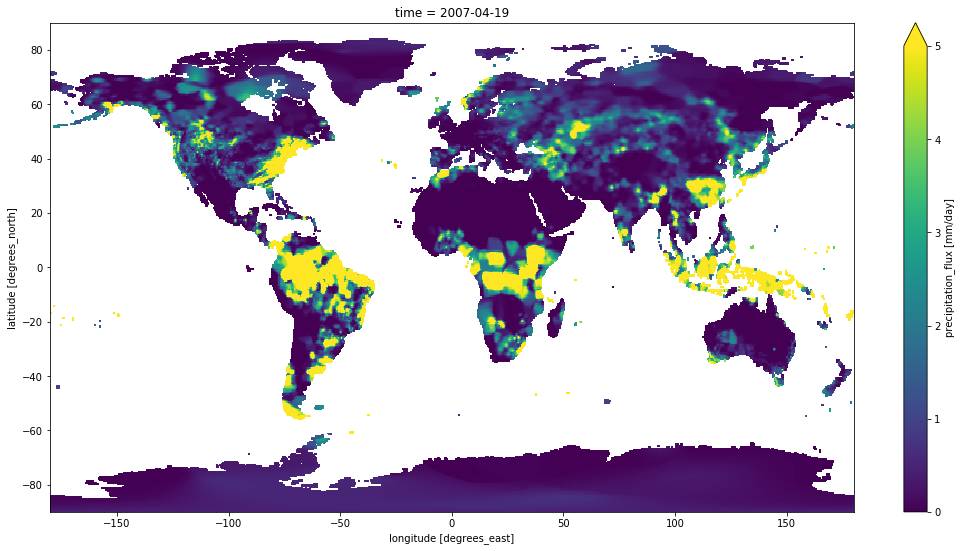

In [12]:
precip2d.plot.pcolormesh(vmax = 5, figsize=(18,9))

#### Time-series at a given location (here ESRIN), and histogram lf values

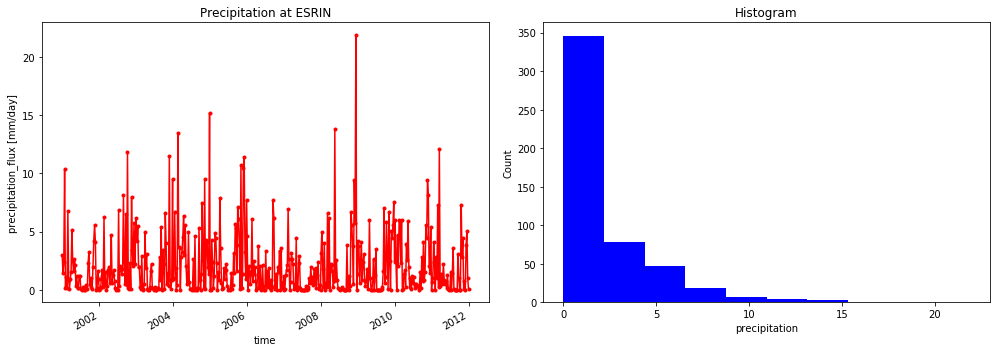

In [13]:
fig, ax = plt.subplots(figsize = [14,5], ncols=2)

precip1d.plot(ax = ax[0], color ='red', marker ='.')
ax[0].set_title("Precipitation at ESRIN")
precip1d.plot.hist(ax = ax[1], color ='blue')
ax[1].set_xlabel("precipitation")
plt.tight_layout()

### Make use of the known and stable strucutre of all data in the ESDC and create high-level methods for visualization


In [14]:
from mpl_toolkits.basemap import Basemap
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [15]:
def map_plot(ds, var=None, time = 0, title_str='No title', **kwargs):
    ''' 
    Expects a data set and a variable name to plot
    
    '''
    if isinstance(time,int):
        res = ds[var].isel(time=time)
    elif time is None:
        res = ds[var]
        time = None
    else: 
        try: 
            res = ds[var].sel(time=time,method='nearest')
        except: 
            print("Wrong date format, should be YYYY-MM-DD")
            raise    
   
    lons, lats = np.meshgrid(np.array(res.lon),np.array(res.lat))
    ma_res = np.ma.array(res, mask =np.isnan(res))
    
    if "vmin" in kwargs:
        vmin = kwargs["vmin"] 
    else:
        vmin = None
    if "vmax" in kwargs:
        vmax = kwargs["vmax"] 
    else:
        vmax = None
    if title_str == "No title":
        title_str = var + ' ' +str(time)
    else:
        title_str = title_str + ' ' +str(res.time.values)[0:10]
        
    fig = plt.figure()
    ax = fig.add_axes([0.05,0.05,0.9,0.9])
    m = Basemap(projection='kav7',lon_0=0,resolution=None)
    m.drawmapboundary(fill_color='0.3')
    ccmap = plt.cm.jet
    ccmap.set_bad("gray",1.)
    im = m.pcolormesh(lons,lats,ma_res,shading='flat',cmap=ccmap,latlon=True, vmin = vmin, vmax=vmax)
    # lay-out 
    m.drawparallels(np.arange(-90.,90.,30.))
    m.drawmeridians(np.arange(-180.,180.,60.))
    cb = m.colorbar(im,"bottom", size="5%", pad="2%")
    cb.set_label(ds[var].attrs['standard_name']+' ('+ds[var].attrs['units']+')')
    ax.set_title(title_str)
    # write to disk if specified 
    if "plot_me" in kwargs:
        if kwargs["plot_me"] == True:
            plt.savefig(title_str[0:15] + '.png',dpi = 600)
            
    fig.set_size_inches(8,12)
    return fig ,ax, m

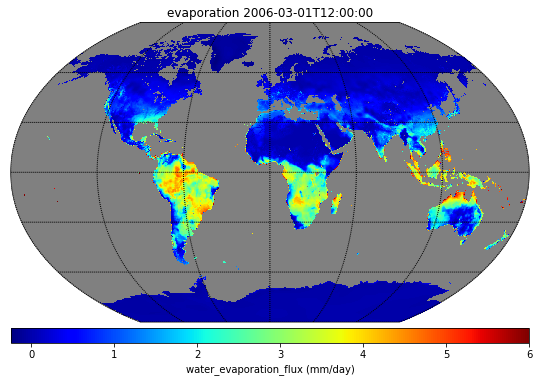

In [16]:
fig, ax, m = map_plot(ESDC,'evaporation','2006-03-01T12:00:00',vmax = 6.)

#### Subsetting geographical sub-region. Note that the slice of the latitude dimension has to be in reverse order.

In [17]:
Europe = ESDC.sel(lat = slice(70.,30.), lon = slice(-20.,35.))

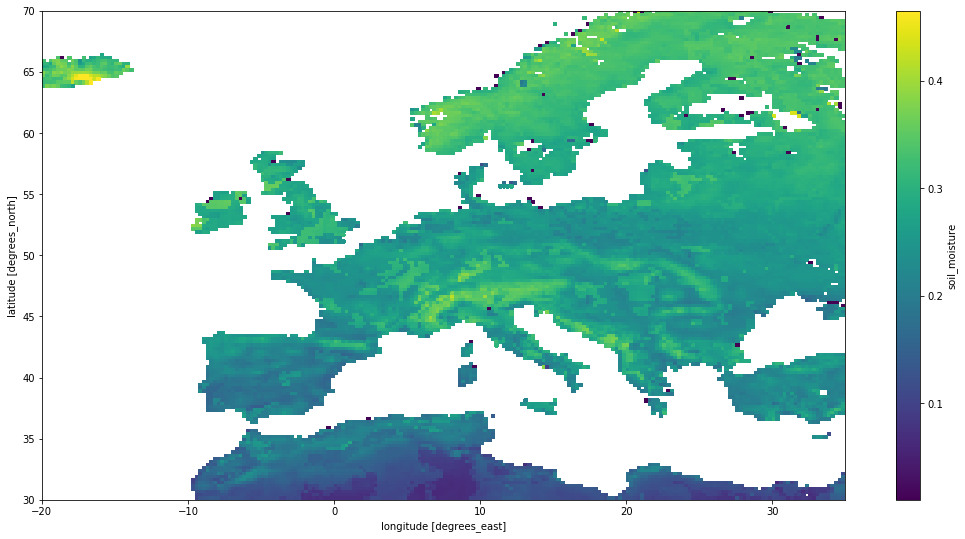

In [18]:
Europe.mean(dim='time',skipna=True).soil_moisture.plot(figsize=(18,9))

#### Seasonal averages

In [19]:
Air_temp_monthly = Europe.air_temperature_2m.groupby('time.month').mean(dim='time')

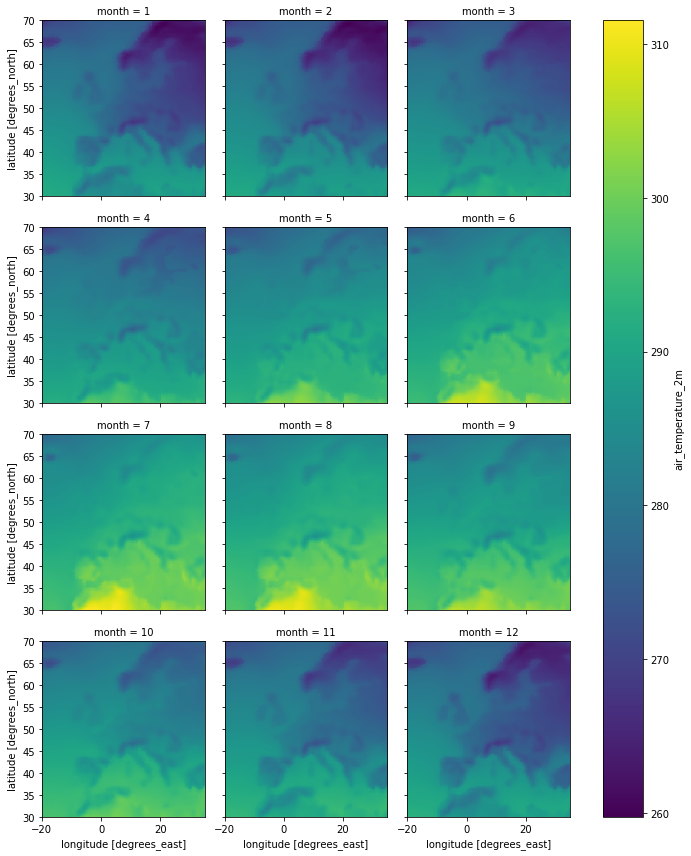

In [20]:
Air_temp_monthly.plot.imshow(x='lon',y='lat',col='month',col_wrap=3)

#### Zscores

In [21]:
Europe_zscore = (Europe-Europe.mean(dim='time'))/Europe.std(dim='time')

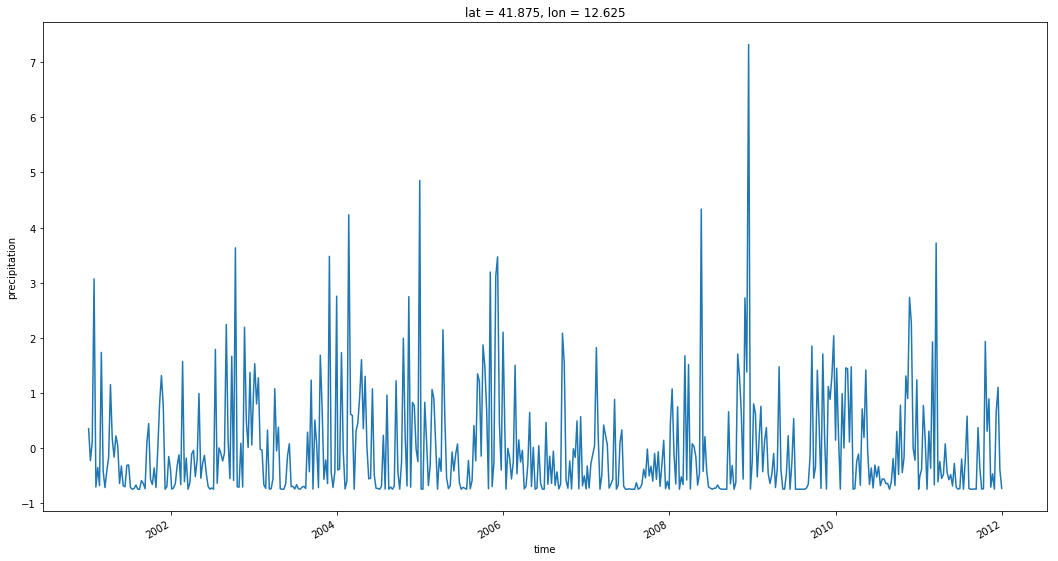

In [22]:
ESRIN_zscore = Europe_zscore.sel(lon = 12.67,lat = 41.83, method = 'nearest')
ESRIN_zscore.precipitation.plot(figsize=(18,9))

#### Using apply() to apply any arbitrary function to all variables in the dataset

In [23]:
Europe.apply(np.nanmax)

<xarray.Dataset>
Dimensions:                            ()
Data variables:
    aerosol_optical_thickness_1610     float32 1.42472
    aerosol_optical_thickness_550      float32 1.87621
    aerosol_optical_thickness_555      float32 1.86289
    aerosol_optical_thickness_659      float32 1.65257
    aerosol_optical_thickness_865      float32 1.49232
    air_temperature_2m                 float32 314.557
    bare_soil_evaporation              float32 2.77386
    black_sky_albedo                   float32 1.21732
    burnt_area                         float32 36098.2
    c_emissions                        float32 703.124
    country_mask                       float64 833.0
    evaporation                        float32 7.40476
    evaporative_stress                 float32 1.0
    fractional_snow_cover              float32 100.0
    gross_primary_productivity         float32 12.5875
    interception_loss                  float32 3.46082
    land_surface_temperature           float32 331.76

### Define own function for anomaly detection. 

In [24]:
def above_Nsigma(x,Nsigma):
    return xr.ufuncs.fabs(x)>Nsigma

In [25]:
res = Europe_zscore.apply(above_Nsigma,Nsigma = 2)

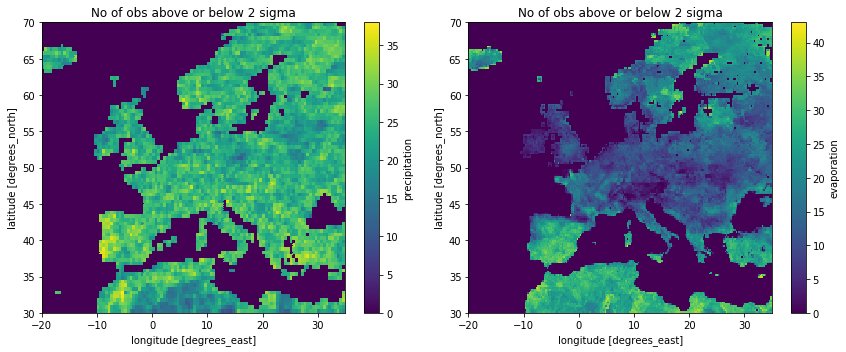

In [26]:
fig2, ax2 = plt.subplots(figsize = [12,5], ncols=2)

res["precipitation"].sum(dim="time").plot(ax = ax2[0])
ax2[0].set_title("No of obs above or below 2 sigma")

res["evaporation"].sum(dim="time").plot(ax = ax2[1])
ax2[1].set_title("No of obs above or below 2 sigma")

plt.tight_layout()



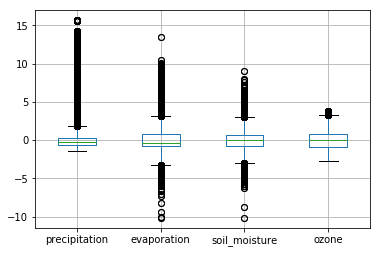

In [27]:
df = Europe_zscore.to_dataframe()
df.boxplot(column=["precipitation","evaporation","soil_moisture","ozone"])

In [28]:
df

lat_bnds  lon_bnds  time_bnds  \
bnds lat    lon     time                                        
0    69.875 -19.875 2001-01-05     69.75     -20.0 2001-01-01   
                    2001-01-13     69.75     -20.0 2001-01-09   
                    2001-01-21     69.75     -20.0 2001-01-17   
                    2001-01-29     69.75     -20.0 2001-01-25   
                    2001-02-06     69.75     -20.0 2001-02-02   
                    2001-02-14     69.75     -20.0 2001-02-10   
                    2001-02-22     69.75     -20.0 2001-02-18   
                    2001-03-02     69.75     -20.0 2001-02-26   
                    2001-03-10     69.75     -20.0 2001-03-06   
                    2001-03-18     69.75     -20.0 2001-03-14   
                    2001-03-26     69.75     -20.0 2001-03-22   
                    2001-04-03     69.75     -20.0 2001-03-30   
                    2001-04-11     69.75     -20.0 2001-04-07   
                    2001-04-19     69.75     -20.0 2001-04-15   
                    2001-04-27     69.75     -20.0 2001-04-23   
                    2001-05-05     69.75     -20.0 2001-05-01   
                    2001-05-13     69.75     -20.0 2001-05-09   
                    2001-05-21     69.75     -20.0 2001-05-17   
                    2001-05-29     69.75     -20.0 2001-05-25   
                    2001-06-06     69.75     -20.0 2001-06-02   
                    2001-06-14     69.75     -20.0 2001-06-10   
                    2001-06-22     69.75     -20.0 2001-06-18   
                    2001-06-30     69.75     -20.0 2001-06-26   
                    2001-07-08     69.75     -20.0 2001-07-04   
                    2001-07-16     69.75     -20.0 2001-07-12   
                    2001-07-24     69.75     -20.0 2001-07-20   
                    2001-08-01     69.75     -20.0 2001-07-28   
                    2001-08-09     69.75     -20.0 2001-08-05   
                    2001-08-17     69.75     -20.0 2001-08-13   
                    2001-08-25     69.75     -20.0 2001-08-21   
...                                  ...       ...        ...   
1    30.125  34.875 2011-05-13     30.25      35.0 2011-05-17   
                    2011-05-21     30.25      35.0 2011-05-25   
                    2011-05-29     30.25      35.0 2011-06-02   
                    2011-06-06     30.25      35.0 2011-06-10   
                    2011-06-14     30.25      35.0 2011-06-18   
                    2011-06-22     30.25      35.0 2011-06-26   
                    2011-06-30     30.25      35.0 2011-07-04   
                    2011-07-08     30.25      35.0 2011-07-12   
                    2011-07-16     30.25      35.0 2011-07-20   
                    2011-07-24     30.25      35.0 2011-07-28   
                    2011-08-01     30.25      35.0 2011-08-05   
                    2011-08-09     30.25      35.0 2011-08-13   
                    2011-08-17     30.25      35.0 2011-08-21   
                    2011-08-25     30.25      35.0 2011-08-29   
                    2011-09-02     30.25      35.0 2011-09-06   
                    2011-09-10     30.25      35.0 2011-09-14   
                    2011-09-18     30.25      35.0 2011-09-22   
                    2011-09-26     30.25      35.0 2011-09-30   
                    2011-10-04     30.25      35.0 2011-10-08   
                    2011-10-12     30.25      35.0 2011-10-16   
                    2011-10-20     30.25      35.0 2011-10-24   
                    2011-10-28     30.25      35.0 2011-11-01   
                    2011-11-05     30.25      35.0 2011-11-09   
                    2011-11-13     30.25      35.0 2011-11-17   
                    2011-11-21     30.25      35.0 2011-11-25   
                    2011-11-29     30.25      35.0 2011-12-03   
                    2011-12-07     30.25      35.0 2011-12-11   
                    2011-12-15     30.25      35.0 2011-12-19   
                    2011-12-23     30.25      35.0 2011-12-27   
  

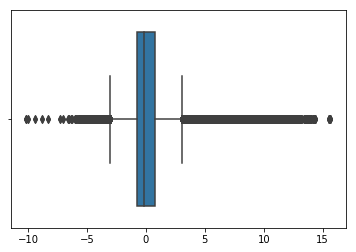

In [29]:
sn.boxplot(df[['precipitation','evaporation','soil_moisture','air_temperature_2m','ozone']])